In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
data = pd.read_excel('new_correct_dataset.xlsx')
# data_csv= pd.read_csv('new_correct_dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   code sample                     60 non-null     object        
 1   planting date                   60 non-null     datetime64[ns]
 2   harvest date                    60 non-null     datetime64[ns]
 3   shape (regular/Irregular)       60 non-null     object        
 4   root health                     60 non-null     object        
 5   root length (cm)                59 non-null     float64       
 6   plant height(cm)                59 non-null     float64       
 7   weight (g)                      59 non-null     float64       
 8   chlorophyll(a) (mg/g)           8 non-null      float64       
 9   plant dry matter (%)            8 non-null      float64       
 10  leaf count (no.)                59 non-null     float64       
 11  leaf siz

In [4]:
data.head()

,code sample,planting date,harvest date,shape (regular/Irregular),root health,root length (cm),plant height(cm),weight (g),chlorophyll(a) (mg/g),plant dry matter (%),leaf count (no.),leaf size (cm2),disease occurrence trends,water use efficiency,energy consumption,growth rate,nutrient absorption efficiency,marketable yield,flowering,notes
0,S1A10,2025-03-18,2025-04-05,R,Good,27.0,33.0,114.0,NaN,NaN,26.0,108.00,no,NaN,NaN,NaN,NaN,NaN,yes,Burning was observed on the upper leaflets of ...
1,S1A8,2025-03-18,2025-11-05,R,Good,26.0,34.0,38.0,NaN,NaN,29.0,101.25,no,NaN,NaN,NaN,NaN,NaN,yes,NaN
2,S1A6,2025-03-18,2025-11-05,R,Good,25.0,35.0,60.0,NaN,NaN,53.0,108.00,no,NaN,NaN,NaN,NaN,NaN,yes,Burning was observed on the upper leaflets of ...
3,S1B9,2025-03-18,2025-04-05,R,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,It was observed that the plant is dead.
4,S1B7,2025-03-18,2025-11-05,R,Good,20.0,41.0,136.0,0.64,9.28,73.0,108.00,no,NaN,NaN,NaN,NaN,NaN,yes,Burning was observed on the upper leaflets of ...


#### Feature engineering

1. code sample to be used to identify solar/grid energy source. S1 & 4 are solar, S2 & 3 are grid - CHECK
2. planting and harvest dates to be converted to British standard and new feature to be created - timedelta from planting to harvest - CHECK
3. shape R/I replaced - one-hot encoded as shape-R, shape-IR - CHECK
4. all numeric values to be converted to float - CHECK
5. marketable yield can be removed - weight used as target value 
6. chlorophyll data present only for 8/60 observations hence can't be effectively used for nutrient absorption efficiency either
7. disease occurence trend to be converted to True/False - CAN BE REMOVED THEY'RE ALL HEALTHY
8. plant dry matter has too little observations to be reliable in this case
9. root health to be converted to float  - CAN BE REMOVED THEY'RE ALL HEALTHY

In [5]:
"""1. code sample to be used to identify solar/grid energy source. S1 & 4 are solar, S2 & 3 are grid."""

import re

def extract_shelf(code):
    match = re.match(r'S(\d+)', code)
    if match:
        return int(match.group(1))
    return None

data['shelf'] = data['code sample '].apply(extract_shelf)
data['energy-solar'] = data['shelf'].isin([1, 4]).astype(float)
data['energy-grid'] = data['shelf'].isin([2, 3]).astype(float)

In [6]:
"""2. planting and harvest dates to be converted to British standard and new feature to be created - timedelta from planting to harvest"""
import datetime

data['planting date'] = pd.to_datetime(data['planting date'], format='%m/%d/%Y')
data['harvest date '] = pd.to_datetime(data['harvest date '], format='%d/%m/%Y')

data['cor harvest date'] = data['harvest date '].apply(lambda x: datetime.datetime(year=x.year, month = x.day, day = x.month))
data.drop(columns=['harvest date '], inplace=True)

# Calculate time delta in days between planting and harvest
data['growing_period_days'] = (data['cor harvest date'] - data['planting date']).dt.days.astype(float)

In [7]:
data.head()

,code sample,planting date,shape (regular/Irregular),root health,root length (cm),plant height(cm),weight (g),chlorophyll(a) (mg/g),plant dry matter (%),leaf count (no.),...,growth rate,nutrient absorption efficiency,marketable yield,flowering,notes,shelf,energy-solar,energy-grid,cor harvest date,growing_period_days
0,S1A10,2025-03-18,R,Good,27.0,33.0,114.0,NaN,NaN,26.0,...,NaN,NaN,NaN,yes,Burning was observed on the upper leaflets of ...,1,1.0,0.0,2025-05-04,47.0
1,S1A8,2025-03-18,R,Good,26.0,34.0,38.0,NaN,NaN,29.0,...,NaN,NaN,NaN,yes,NaN,1,1.0,0.0,2025-05-11,54.0
2,S1A6,2025-03-18,R,Good,25.0,35.0,60.0,NaN,NaN,53.0,...,NaN,NaN,NaN,yes,Burning was observed on the upper leaflets of ...,1,1.0,0.0,2025-05-11,54.0
3,S1B9,2025-03-18,R,Good,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,It was observed that the plant is dead.,1,1.0,0.0,2025-05-04,47.0
4,S1B7,2025-03-18,R,Good,20.0,41.0,136.0,0.64,9.28,73.0,...,NaN,NaN,NaN,yes,Burning was observed on the upper leaflets of ...,1,1.0,0.0,2025-05-11,54.0


In [8]:
"""shape R/I replaced - one-hot encoded as shape-R, shape-IR"""
data['shape-R'] = data['shape (regular/Irregular)'] == 'R'
data['shape-IR'] = data['shape (regular/Irregular)'] == 'IR'
data[['shape-R','shape-IR']] = data[['shape-R','shape-IR']].astype(float)

In [9]:
"""4. all numeric values to be converted to float""" 
# CHECK

'4. all numeric values to be converted to float'

In [10]:
"""7. disease occurence trend to be converted to True/False"""

# data['disease occurrence trends']
# data['flowering '].value_counts()
data['disease occurrence trends'].value_counts() # CAN BE REMOVED
# data.info()

disease occurrence trends
no    60
Name: count, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   code sample                     60 non-null     object        
 1   planting date                   60 non-null     datetime64[ns]
 2   shape (regular/Irregular)       60 non-null     object        
 3   root health                     60 non-null     object        
 4   root length (cm)                59 non-null     float64       
 5   plant height(cm)                59 non-null     float64       
 6   weight (g)                      59 non-null     float64       
 7   chlorophyll(a) (mg/g)           8 non-null      float64       
 8   plant dry matter (%)            8 non-null      float64       
 9   leaf count (no.)                59 non-null     float64       
 10  leaf size (cm2)                 58 non-null     float64       
 11  disease 

In [12]:
data['root health '].value_counts() #CAN BE REMOVED

root health 
Good    60
Name: count, dtype: int64

In [13]:
import numpy as np

mapping = {'yes': 1, 'no': 0, np.nan: np.nan}
data['flowering'] = data['flowering '].map(mapping)

selecting only necessary columns

In [14]:
cols_to_keep = [
    'root length (cm)', 'plant height(cm)', 'weight (g)', 
    'leaf count (no.)', 'leaf size (cm2)', 'flowering', 
    'energy-solar', 'energy-grid', 'growing_period_days',
    'shape-R', 'shape-IR'
    ]
df = data[cols_to_keep].copy()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   root length (cm)     59 non-null     float64
 1   plant height(cm)     59 non-null     float64
 2   weight (g)           59 non-null     float64
 3   leaf count (no.)     59 non-null     float64
 4   leaf size (cm2)      58 non-null     float64
 5   flowering            59 non-null     float64
 6   energy-solar         60 non-null     float64
 7   energy-grid          60 non-null     float64
 8   growing_period_days  60 non-null     float64
 9   shape-R              60 non-null     float64
 10  shape-IR             60 non-null     float64
dtypes: float64(11)
memory usage: 5.3 KB


dealing with Na values

In [16]:
df[df['flowering'].isna()]

,root length (cm),plant height(cm),weight (g),leaf count (no.),leaf size (cm2),flowering,energy-solar,energy-grid,growing_period_days,shape-R,shape-IR
3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,47.0,1.0,0.0


In [17]:
df.dropna(subset=['flowering', 'leaf count (no.)'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 0 to 59
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   root length (cm)     59 non-null     float64
 1   plant height(cm)     59 non-null     float64
 2   weight (g)           59 non-null     float64
 3   leaf count (no.)     59 non-null     float64
 4   leaf size (cm2)      58 non-null     float64
 5   flowering            59 non-null     float64
 6   energy-solar         59 non-null     float64
 7   energy-grid          59 non-null     float64
 8   growing_period_days  59 non-null     float64
 9   shape-R              59 non-null     float64
 10  shape-IR             59 non-null     float64
dtypes: float64(11)
memory usage: 5.5 KB


one missing value in leaf size we will impute with the median

In [18]:
leaf_size_median = df['leaf size (cm2)'].median()
na_index = df['leaf size (cm2)'].index[df['leaf size (cm2)'].isna()][0]
df.loc[na_index, 'leaf size (cm2)'] = leaf_size_median

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 0 to 59
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   root length (cm)     59 non-null     float64
 1   plant height(cm)     59 non-null     float64
 2   weight (g)           59 non-null     float64
 3   leaf count (no.)     59 non-null     float64
 4   leaf size (cm2)      59 non-null     float64
 5   flowering            59 non-null     float64
 6   energy-solar         59 non-null     float64
 7   energy-grid          59 non-null     float64
 8   growing_period_days  59 non-null     float64
 9   shape-R              59 non-null     float64
 10  shape-IR             59 non-null     float64
dtypes: float64(11)
memory usage: 7.6 KB


In [20]:
df['growth_rate'] = df['plant height(cm)']/df['growing_period_days']
df['energy_consumption'] = 0.2 * df['growing_period_days']
# TODO confirm water use efficiency

#### EDA

In [21]:
df.corr()

,root length (cm),plant height(cm),weight (g),leaf count (no.),leaf size (cm2),flowering,energy-solar,energy-grid,growing_period_days,shape-R,shape-IR,growth_rate,energy_consumption
root length (cm),1.000000,0.780908,0.763823,0.603555,0.768914,0.392997,0.213759,-0.213759,-0.056410,0.013170,-0.013170,0.779690,-0.056410
plant height(cm),0.780908,1.000000,0.827660,0.729393,0.768006,0.545833,-0.005125,0.005125,-0.017888,0.179541,-0.179541,0.980076,-0.017888
weight (g),0.763823,0.827660,1.000000,0.746359,0.791490,0.416544,0.187101,-0.187101,-0.163388,0.106222,-0.106222,0.840651,-0.163388
leaf count (no.),0.603555,0.729393,0.746359,1.000000,0.559418,0.267158,0.016455,-0.016455,0.319305,0.103148,-0.103148,0.641089,0.319305
leaf size (cm2),0.768914,0.768006,0.791490,0.559418,1.000000,0.433321,0.229161,-0.229161,-0.191795,0.145906,-0.145906,0.790572,-0.191795
flowering,0.392997,0.545833,0.416544,0.267158,0.433321,1.000000,-0.186059,0.186059,-0.232204,0.269921,-0.269921,0.586245,-0.232204
energy-solar,0.213759,-0.005125,0.187101,0.016455,0.229161,-0.186059,1.000000,-1.000000,0.034100,-0.235412,0.235412,-0.009565,0.034100
energy-grid,-0.213759,0.005125,-0.187101,-0.016455,-0.229161,0.186059,-1.000000,1.000000,-0.034100,0.235412,-0.235412,0.009565,-0.034100
growing_period_days,-0.056410,-0.017888,-0.163388,0.319305,-0.191795,-0.232204,0.034100,-0.034100,1.000000,-0.194745,0.194745,-0.205860,1.000000
shape-R,0.013170,0.179541,0.106222,0.103148,0.145906,0.269921,-0.235412,0.235412,-0.194745,1.000000,-1.000000,0.203443,-0.194745


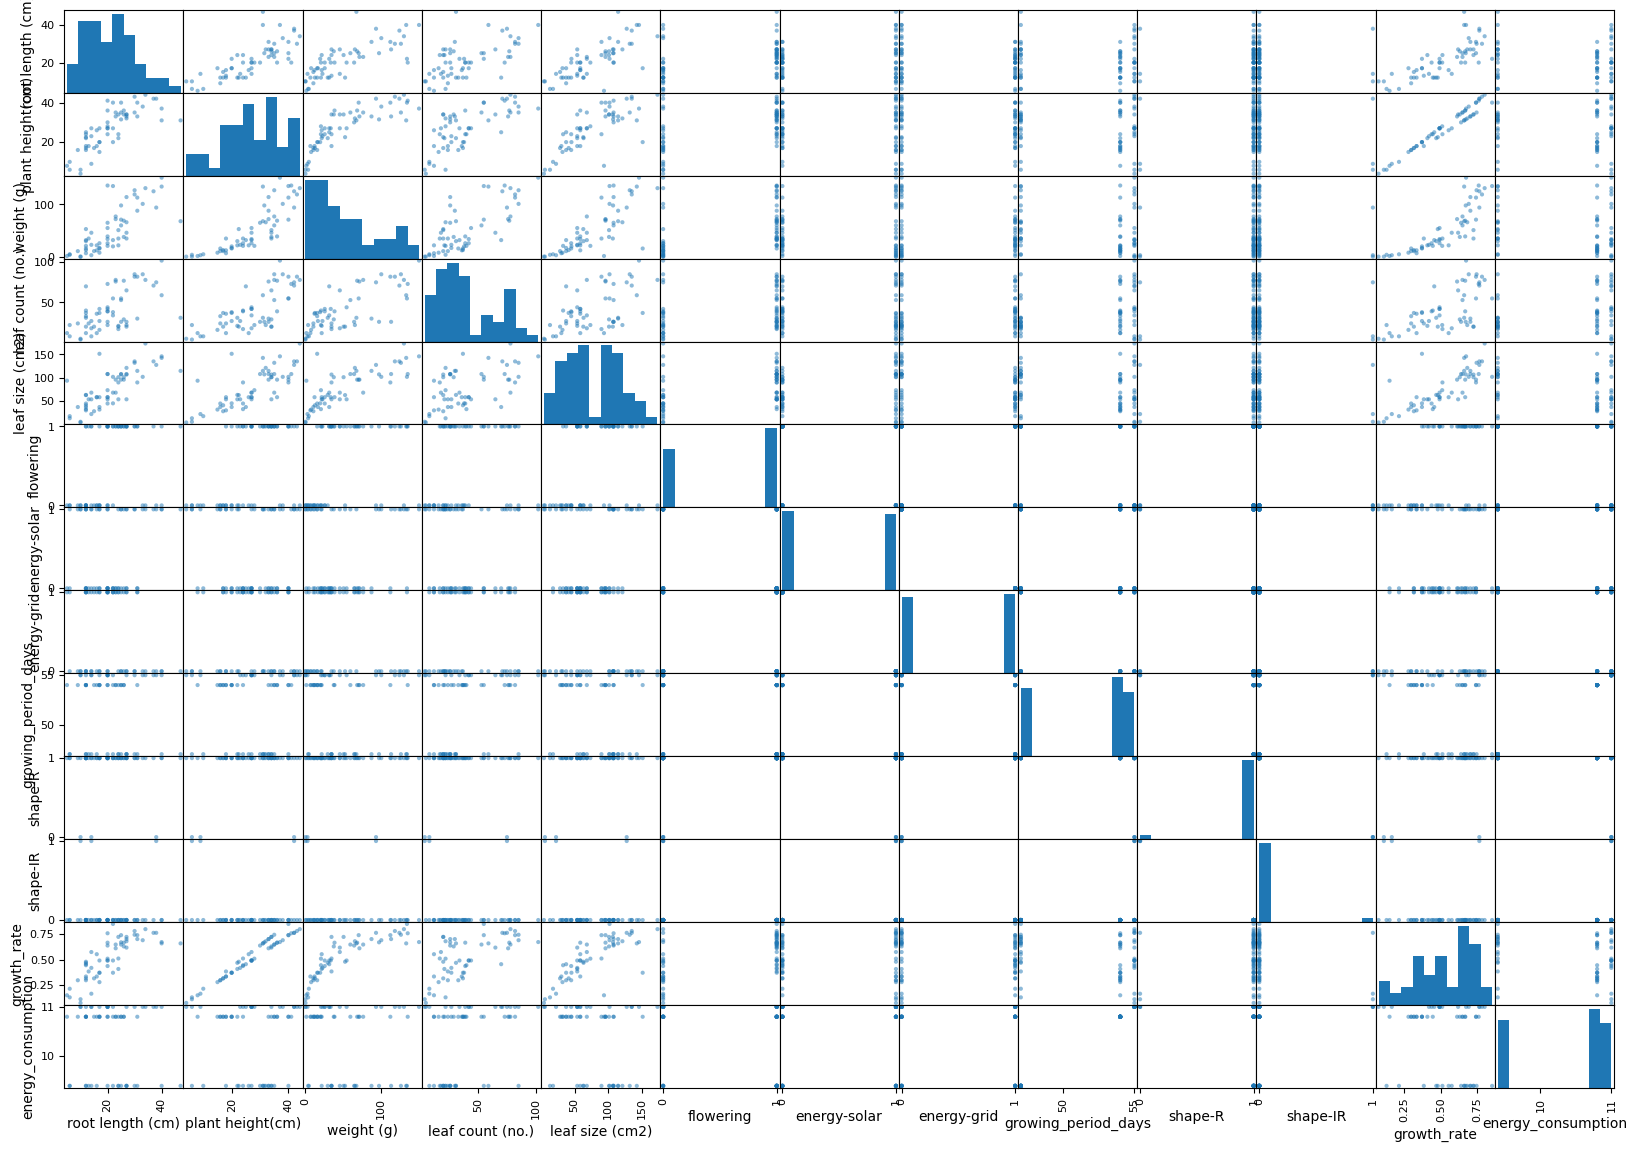

In [22]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(20, 14))
plt.show()

====================== OLD DATA BELOW =================

In [ ]:
data.drop([0, 1], inplace=True)
data.reset_index(inplace=True)
data.drop(columns=['index', 'sample_id', 'Notes'], inplace=True)

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
numeric_cols = ['plant_length_cm', 'plant_width_cm', 'crop_yield_g',
                'root_len_cm', 'plant_height', 'chlorophyll_mgg', 
                'plant_dry_matter', 'leaf_count', 'leaf_size',
                'water_use_efficiency','energy_consumption', 'growth_rate', 
                'nutrient_absorption_efficiency',]
target = ['marketable_yield']

category_cols = ['solar_grid', 'shape', 'root_health', 'disease_occurrence_trend']

In [ ]:
data[numeric_cols+target] = data[numeric_cols+target].apply(pd.to_numeric, downcast='float')

In [ ]:
data['solar_grid_edit'] = data['solar_grid']=='S'  # True(1) if S for solar grid, False(0) if not

In [ ]:
data['shape_edit'] = data['shape']=='R'  # True(1) if regular shape, False(0) if not

In [ ]:
data['root_health_edit'] = data['root_health'].replace({'GOOD': 2, 'FAIR': 1, 'POOR': 0})
data['disease_occurrence_trend_edit'] = data['disease_occurrence_trend'].replace({'Low': 2, 'Moderate': 1, 'High': 0})


In [ ]:
data_new = data.drop(columns=category_cols)

In [ ]:
data_new.info()

EDA

In [ ]:
data_new[numeric_cols+target].corr()

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(data_new[numeric_cols+target], figsize=(12, 8))
plt.show()

In [ ]:
data_new[numeric_cols+target].describe()

Modelling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data_new.drop(target, axis=1)
X_scaled = scaler.fit_transform(X)


X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# df_scaled = pd.concat([X_scaled_df, data_new[target]], axis=1)

In [ ]:
X_scaled_df.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, data_new[target], test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)


In [ ]:
y_pred = reg.predict(X_test)
root_mean_squared_error(y_test, y_pred)

In [ ]:
y_test.describe()

Dimensionality reduction - PCA

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

def apply_pca(X_scaled, y, n_components=7):

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Get explained variance ratio
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    # Create DataFrame with transformed features
    pca_df = pd.DataFrame(
        X_pca, 
        columns=[f'PC{i+1}' for i in range(n_components)]
    )
    
    # Add target back to DataFrame
    pca_df['target'] = y.values
    
    # Print variance explained
    print("\nExplained variance ratio by component:")
    for i, var in enumerate(explained_variance):
        print(f"PC{i+1}: {var:.3f}")
    
    print("\nCumulative explained variance ratio:")
    for i, var in enumerate(cumulative_variance):
        print(f"First {i+1} components: {var:.3f}")
        
    return pca_df, pca, scaler

In [ ]:
pca_df, pca, scaler = apply_pca(X_scaled=X_scaled, y = data_new[target], n_components=7)

In [ ]:
X = pca_df.drop('target', axis=1)
y = pca_df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Modelling on post-PCA dataset

In [ ]:
reg_PCA = LinearRegression().fit(X_train, y_train)
reg_PCA.score(X_train, y_train)

In [ ]:
y_pred = reg_PCA.predict(X_test)
root_mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

def compare_models(X, y):
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=1.0)
    }
    
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=2, scoring='r2')
        print(f"\n{name}:")
        print(f"Mean R2: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

compare_models(X_train, y_train)

Ridge

In [ ]:
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
ridge.score(X_train, y_train)

In [ ]:
y_pred = ridge.predict(X_test)
root_mean_squared_error(y_test, y_pred)

Lasso

In [ ]:
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
lasso.score(X_train, y_train)

In [ ]:
y_pred = lasso.predict(X_test)
root_mean_squared_error(y_test, y_pred)

Remaining

Decision Tree with:

    Limited depth
    Strong pruning parameters
    Simple rules

Simple KNN

    With small k value (e.g., k=3)
    Easy to interpret



KNN (with k=3)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

In [ ]:
y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

In [ ]:
y_test

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor.fit(X_train, y_train)

In [ ]:
y_pred = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')